* Cubic Discriminant https://brilliant.org/wiki/cubic-discriminant/

In [1]:
import sympy as sp
from sos_manager import SOS_Manager
from text_process import PreprocessText as pl
import sympy as sp 
def monom_of(x, m):
    # v = 0
    # for coeff, monom in zip(x.coeffs(), x.monoms()):
    #     if monom[-len(m):] == m:
    #         v += coeff 
    # return coeff
    m = (m[0], m[1], sum(x.monoms()[0][-3:]) - m[0]-m[1])
    # print(x.monoms()[0])
    for i in range(m[0]):
        x = x.diff('a')
    x = x.subs('a',0)
    for i in range(m[1]):
        x = x.diff('b')
    x = x.subs('b',0)
    for i in range(m[2]):
        x = x.diff('c')
    x = x.subs('c',0)
    return x / sp.factorial(m[0]) / sp.factorial(m[1]) / sp.factorial(m[2])

def cubicdiscriminant(a,b,c,d):
    return b*b*c*c-4*a*c**3-4*b**3*d-27*a*a*d*d+18*a*b*c*d

def swa(x):
    a = str(x).replace(' ','').replace('**','^')
    print(a)
    return a

def sdesmos(x):
    a = (sp.latex(x).replace(' ',''))
    print(a)
    return a

def pqrt(a, b, c = sp.S(1)):
    w = c + a + b
    q = (a*c+a*b+b*c) / w / w
    return 1, q, c*a*b/w/w/w, sp.sqrt(1-3*q) 
# ker = (-4*p**3*r+p*p*q*q+18*p*q*r-4*q**3-27*r*r).factor() 

In [23]:
p,n,q,r,t=sp.symbols('p n q r t')
# y0 = pl('(a4+p*a3b+n*a2b2+q*ab3+r*a2bc)',cyc=True)
# y = y0-pl('s(a2-tbc)2')*(1+p+n+q+r)/3/(t-1)**2
# sp.collect(y.as_expr(),'a')
u = sp.symbols('u')#(1+p+n+q+r)/3/(t-1)**2
m1,p1,n1,q1,r1 = 1-u, p+2*t*u, n-(t*t+2)*u, q+2*t*u, r-(2*t*t-2*t)*u
# monom_of(pl('s(a2-tbc)2'),(2,1,1))
# det = sp.collect((3*m1*(m1+n1)-(p1*p1+q1*q1+p1*q1)).factor().args[-1],t)
# # det.subs(zip('pnqr',(-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5))).factor()
# d1 = det.args[10]/t**3
# d2 = det.args[9]/t/t
# d3 = det.args[8]/t
# d4 = det.subs('t',0)
# # cubicdiscriminant(d1,d2,d3,d4).factor()
# sp.collect(sp.expand(det),r)
# u,v=-(p1+2*q1)/3/m1,-(q1+2*p1)/3/m1
var = (-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5)
var = (-sp.S(14)/3,18,-sp.S(14)/3,-sp.S(26)/3)
var = (sp.S(23)/8,6,4,sp.S(105)/8)
var =  (sp.S(17124)/4293,sp.S(25758)/4293,sp.S(17172)/4293,sp.S(52028)/4293)
var = (-6,11,-6,12)
# (v).subs(zip('pnqr',var)).factor().subs(t,sp.S(3)/2)
# # b = sp.symbols('b')
# # a=sp.sympify('(b*(b+u-v)-1)/(b*u-v)')
# # f1,f2 = sp.fraction(((a*a+b*b+1)/(a*b+b+a)).factor())
# # eq = sp.sympify('b**3+((v-u)*(u*v+u+v-2)+u**3+1)/(1-u*v)*b*b+((v-u)*(u*v+u+v-2)-v**3-1)/(1-u*v)*b-1')
# # # sp.collect(sp.expand(sp.collect(sp.expand(f1-f2),'b')-sp.sympify(u*u-u+1)*b*eq),b)
# # eq2 = sp.collect(sp.expand(sp.collect(sp.expand(f1-sp.sympify('c')*f2),'b')-sp.sympify('u*u+1-c*u')*b*eq),b)
# # eq3 = sp.collect((eq2.args[-2]/b/b/b+eq2.subs(b,0)).factor().args[-1],'c')
# # -(eq3.subs('c',0)/eq3.diff('c').subs('c',0)).factor()#.subs('u',1).subs('v',2)
# eq4 = sp.collect((((u*u+v*v-u*v-u-v+3)/(u+v-1))-t).factor().args[-1],t)
# sp.polys.nroots(eq4.subs(zip('pnqr',var)))
# eq4
detu = sp.collect((3*m1*(m1+n1)-(p1*p1+q1*q1+p1*q1)).factor(),'u')
detu2 = detu.diff('u').diff('u').subs('u',0)/2
detu1 = detu.diff('u').subs('u',0)
detu0 = detu.subs('u',0)
(detu1**2-4*detu2*detu0).subs(zip('pnqr',var)).factor()
var = (-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5)
det = sp.collect((detu1**2-4*detu2*detu0).factor()/9,'t')
print(sp.latex(det.subs(zip('pnqr',var)).factor().subs('t','x')))

x^{4} - \frac{108 x^{3}}{5} + 102 x^{2} - \frac{4212 x}{25} + \frac{2277}{25}


In [52]:
print(sp.latex((det).subs(zip('pnqr',var)).factor().subs('t','x')))
# sp.collect(sp.expand(eq4.subs(r,3*(t-1)**2-p-n-q)).factor(),t)
# eq4.subs(t,1).factor()
var = (-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5)
var = (-6,11,-6,12)
# print(sp.latex((eq4).subs(zip('pnqr',var)).factor().subs('t','x')))
# sp.collect(sp.expand(det),'r')
# sp.collect(sp.expand(eq4),'r')
# sp.collect(sp.collect(sp.expand(det+(t+1)*eq4),'r').factor().args[-1]-eq4,'t')
# det.subs(zip('pnq',var[:-1])).subs('t',3).factor()
# ==============================
# r such that det >= 0 holds for any t, to relax the condition, delta <= 0
rr2=det.diff('r').diff('r')/2
rr1=det.diff('r').subs('r',0)
rr0=det.subs('r',0)
delta = -(4*rr2*rr0-rr1*rr1).factor()
# sp.collect(delta.args[-1],'t')
var = (-6,11,-6,12)
print('0 >= det =', sp.latex((det).subs(zip('pnqr',var)).factor().subs('t','x')))
print(sp.latex((3*(t-1)**2-(1+n+p+q+r)).subs(zip('pnqr',var)).subs('t','x')))
print('0 == eq =',sp.latex((eq4).subs(zip('pnqr',var)).factor().subs('t','x')))
nrts = sp.polys.nroots(((eq4).subs(zip('pnqr',var)).factor().subs('t','x')))
print(nrts)
print([((1+p+n+q+r)/3).subs(zip('pnqr',var))/(nr-1)**2 for nr in nrts])
(det).subs(zip('pnqr',var)).subs(t,nrts[1])

12 \left(x - 3\right)^{2} \cdot \left(7 x - 1\right)
0 >= det = 12 \left(x - 3\right)^{2} \cdot \left(7 x - 1\right)
3 \left(x - 1\right)^{2} - 12
0 == eq = - 3 \left(x - 3\right)^{2} \cdot \left(11 x^{2} - 10 x + 11\right)
[3.00000000000000, 3.00000000000000, 0.454545454545455 - 0.890723542830247*I, 0.454545454545455 + 0.890723542830247*I]
[1.00000000000000, 1.00000000000000, 4/(-0.545454545454545 - 0.890723542830247*I)**2, 4/(-0.545454545454545 + 0.890723542830247*I)**2]


0

In [43]:
# var = (-6,11,-6,12)
print(sp.collect((3*m1*(m1+n1)-(p1*p1+q1*q1+p1*q1)).factor().args[-1],t).subs(zip('pnqr',var)).subs(t,nrts[1]))
# u,v=-(p1+2*q1)/3/m1,-(q1+2*p1)/3/m1
# monom_of(pl('s(a2-xab)2'),(2,1,1))
# pl('s(a2-xab)2').subs(zip('abc',(1,1,1)))
# (m1+p1+n1+q1+r1).factor()
# u.subs(zip('pnqr',var)).subs('t',nrts[1])
# a,b,c=sp.symbols('a b c')
# y = (a**4+b**4+c**4)*m1+(a**3*b+b**3*c+c**3*a)*p1+(a*a*b*b+b*b*c*c+c*c*a*a)*n1+(a*b**3+b*c**3+c*a**3)*q1+r1*a*b*c*(a+b+c)
# y = y.subs(zip('pnqr',var)).subs('t',nrts[1])
# yyy = sp.expand((y-m1/2*((a*a-b*b-u*a*c+v*b*c)**2+(b*b-c*c-u*b*a+v*c*a)**2+(c*c-a*a-u*c*b+v*a*b)**2)).subs(zip('pnqr',var)).subs('t',nrts[1]))


0.329288049794741


# Quintic Simple

For $a,b,c\geqslant 0$, we have $\displaystyle \sum ac^2(b-c)^2 \geqslant x abc\displaystyle \sum (a^2-ab)$
where 

$x =-\dfrac{53}{9\sqrt[3]{\frac{457}{54}+\frac{31\sqrt{93}}{18}}}+\dfrac{2}{3}+\displaystyle \sqrt[3]{\frac{457}{54}+\frac{31\sqrt{93}}{18}}\approx 1.5814122$ is the root of $x^{3}-2x^{2}+19x-29=0$.

In [18]:
poly = pl('(2s(a4b)-abcs(7a2-5ab-1/3(a2-ab)))s(ab)')-2*pl('s(a(a2b-abc+x(bc2-abc)+y(b2c-abc))2)')
m,p,n,q = [monom_of(poly, (5-i,1+i,1)) for i in range(4)]
print(sp.latex((3*m*(m+n)-(p*p+p*q+q*q)).factor()).replace(' ',''),'>0')
print(((3*m*(m+n)-(p*p+p*q+q*q))).__str__().replace(' ','').replace('**','^'),'>0')

-\frac{4\cdot\left(3x^{4}-6x^{3}+3x^{2}y^{2}-6x^{2}y+33x^{2}-12xy^{2}+42xy-24x+3y^{4}-12y^{3}+24y^{2}-6y+7\right)}{3} >0
-24*x*y-24*y-(-2*x^2-20/3)^2-(-2*x^2-20/3)*(4*x-2*y^2+4*y-2/3)-(4*x-2*y^2+4*y-2/3)^2+40 >0


In [111]:
poly = pl('(2s(ac2(b-c)2)-xabcs(a2-ab))-(-p(a-b)s(a2+ab)+s(ab)s(a)3-3s(ab)2s(a)-(x+5)abcs(a2-ab))')
# (-p(a-b)s(a2+ab)+s(ab)s(a)3-3s(ab)2s(a)-(x+5)abcs(a2-ab)) >= 0
# -
x,y,p,q,r,t=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r'),sp.symbols('t')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r # -4abcs(a)3+s(ab)2s(a)2+18s(ab)abcs(a)-4s(ab)3-27a2b2c2 = p(a-b)2
poly = 243*sp.collect(((q*p**3-3*q*q*p-(x+5)*r*(p*p-3*q))**2-d*(p*p-q)**2).factor(),'r')
r2 = poly.diff('r').diff('r').subs('r',0) / 2
r1 = poly.diff('r').subs('r',0)
r0 = poly.subs('r',0)
det = sp.collect(((r1**2-4*r2*r0).factor()/t**4/(t*t+2)**2) / 972,'t').subs('t','u').subs('x','t').subs('u','x')
# sdesmos(det.subs('t','31/10'))
dett = (cubicdiscriminant(*det.subs('x','x^(1/2)').as_poly(x).all_coeffs()).factor() / 373248).subs('t','2*t').factor()
sdesmos(dett.subs('t','x').factor())
sdesmos(list(sp.polys.roots(dett))[0])

8\left(x^{3}-2x^{2}+19x-29\right)
-\frac{53}{9\sqrt[3]{\frac{457}{54}+\frac{31\sqrt{93}}{18}}}+\frac{2}{3}+\sqrt[3]{\frac{457}{54}+\frac{31\sqrt{93}}{18}}


'-\\frac{53}{9\\sqrt[3]{\\frac{457}{54}+\\frac{31\\sqrt{93}}{18}}}+\\frac{2}{3}+\\sqrt[3]{\\frac{457}{54}+\\frac{31\\sqrt{93}}{18}}'

$\displaystyle \sum (a^4b+xa^2b^2c)\geqslant y\displaystyle \sum a^3bc$

where $x,y$ is on the certain branch of
$$\begin{aligned}&\Delta_1 = 16x^{4}+\left(-8y^{2}-64y-96\right)x^{3}+\left(y^{4}+32y^{3}+96y^{2}-4y+1144\right)x^{2}\\ &+\left(-4y^{5}-34y^{4}+41y^{3}-554y^{2}+520y-1859\right)x\\ & +4y^{6}-12y^{5}+99y^{4}-248y^{3}+858y^{2}-1521y+2197=0\end{aligned}$$

Rational Nondegenerated Solutions: $\left(\dfrac 92, \dfrac{19}{4}\right)$, $\left(\dfrac{377}{144}, \dfrac{65}{18}\right)$, $\left(\dfrac{221}{9}, \dfrac{94}{9}\right)$, $\left(\dfrac{4233}{400},\dfrac{353}{50}\right)$

In [47]:
# poly = pl('2s(a4b+xa2b2c-ya3bc)-(-p(a-b)s(a2+ab)+s(ab)s(a)3-3s(ab)2s(a)-(2y+1)abcs(a2)+(2x+3)abcs(ab))')
x,y,p,q,r,t=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r'),sp.symbols('t')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r # -4abcs(a)3+s(ab)2s(a)2+18s(ab)abcs(a)-4s(ab)3-27a2b2c2 = p(a-b)2
poly = ((q*p**3-3*q*q*p-(2*y+1)*r*(p*p-2*q)+(2*x+3)*r*q)**2 - d*(p*p-q)**2).expand()
poly = sp.collect(poly,r)
r2,r1,r0 = poly.diff(r).diff(r).subs(r,0)/2, poly.diff(r).subs(r,0), poly.subs(r,0)
det = (r1*r1-4*r2*r0).factor()
det = det.args[-1].subs(t,sp.sqrt(t)).as_poly(t)#.subs(x,sp.S(9)/2).subs(y,sp.S(19)/4).factor()
ker3 = sp.div(det, det.diff())[-1].as_expr().factor().args[-1].as_poly(t)
ker2 = sp.div(det, ker3)[-1].as_expr().factor().args[-1].as_poly(t)
ker1 = sp.div(ker3, ker2)[-1].as_expr().factor().args[-1].as_poly(t)
t0 = - ker1.subs(t,0) / ker1.diff(t).subs(t,0)

In [85]:
# a, b, c=0.120614758428183, 0.426022047760462, 1
# a,b,c = [i/(a+b+c) for i in (a,b,c)]
# print(1-3*(a*b+b*c+c*a)) # 0.25
# # dett = ker2.subs(t,t0) # irreducible
# # det = dett.factor_list()#.subs(x,sp.S(9)/2).subs(y,sp.S(19)/4)
# # dett = dett.as_expr().factor()
# t0p, t0q = sp.fraction(t0)
# t0p, t0q = t0p.as_poly(), t0q.as_poly()
# ker2c = ker2.all_coeffs()
# dett = ker2c[0] * t0p*t0p + ker2c[1] * t0p * t0q + ker2c[2] * t0q * t0q
dett0 = (x-y+1)**3
dett1 = 16*x**4 - 8*x**3*y**2 - 64*x**3*y - 96*x**3 + x**2*y**4 + 32*x**2*y**3 + 96*x**2*y**2 - 4*x**2*y + 1144*x**2 - 4*x*y**5 - 34*x*y**4 + 41*x*y**3 - 554*x*y**2 + 520*x*y - 1859*x + 4*y**6 - 12*y**5 + 99*y**4 - 248*y**3 + 858*y**2 - 1521*y + 2197
dett2 = x**10 + 10*x**9*y + 780*x**9 - 160*x**8*y**2 + 7750*x**8*y + 153680*x**8 - 1920*x**7*y**3 - 48100*x**7*y**2 + 1504010*x**7*y + 633440*x**7 + 2080*x**6*y**4 - 720200*x**6*y**3 + 5343180*x**6*y**2 + 1763540*x**6*y - 1497640*x**6 + 84032*x**5*y**5 - 2944400*x**5*y**4 + 8225240*x**5*y**3 - 13162880*x**5*y**2 - 39412480*x**5*y - 32541464*x**5 + 384000*x**4*y**6 - 5465440*x**4*y**5 + 7074320*x**4*y**4 - 62110240*x**4*y**3 - 194068700*x**4*y**2 - 274475120*x**4*y - 120970160*x**4 + 793600*x**3*y**7 - 4548800*x**3*y**6 + 14145120*x**3*y**5 - 67987520*x**3*y**4 - 294942080*x**3*y**3 - 611650080*x**3*y**2 - 468893600*x**3*y - 138407360*x**3 + 800000*x**2*y**8 - 1443200*x**2*y**7 + 26043200*x**2*y**6 + 26640320*x**2*y**5 - 2422880*x**2*y**4 - 132663520*x**2*y**3 + 63032000*x**2*y**2 + 149824480*x**2*y + 14006720*x**2 + 320000*x*y**9 - 1120000*x*y**8 + 12252800*x*y**7 + 42732800*x*y**6 + 174786560*x*y**5 + 442348160*x*y**4 + 994138880*x*y**3 + 1028243840*x*y**2 + 430152320*x*y + 50618880*x - 1280000*y**9 - 5280000*y**8 - 24230400*y**7 - 60523200*y**6 - 134775168*y**5 - 218316480*y**4 - 466677120*y**3 - 552589440*y**2 - 236221440*y - 34730176
dett3 = 4*x**13 - x**12*y**2 + 40*x**12*y + 1592*x**12 - 10*x**11*y**3 - 672*x**11*y**2 + 15672*x**11*y + 15472*x**11 + 68*x**10*y**4 - 7942*x**10*y**3 + 39268*x**10*y**2 + 76640*x**10*y + 56096*x**10 + 1000*x**9*y**5 - 24516*x**9*y**4 - 63770*x**9*y**3 - 269392*x**9*y**2 - 176640*x**9*y - 2248096*x**9 + 3424*x**8*y**6 + 9792*x**8*y**5 - 305960*x**8*y**4 - 2361444*x**8*y**3 - 276264*x**8*y**2 - 2480224*x**8*y + 77796704*x**8 + 448*x**7*y**7 + 183872*x**7*y**6 + 488440*x**7*y**5 - 5366728*x**7*y**4 + 5423544*x**7*y**3 - 26165512*x**7*y**2 + 256765152*x**7*y - 804612224*x**7 - 22400*x**6*y**8 + 212416*x**6*y**7 + 3470000*x**6*y**6 - 5706728*x**6*y**5 + 36986296*x**6*y**4 - 165864064*x**6*y**3 - 238543760*x**6*y**2 - 6899516768*x**6*y - 1243857088*x**6 - 45824*x**5*y**9 - 522624*x**5*y**8 + 5602720*x**5*y**7 - 12077776*x**5*y**6 + 125286672*x**5*y**5 + 108176992*x**5*y**4 + 662456768*x**5*y**3 - 16477570656*x**5*y**2 - 2244174752*x**5*y - 10627944704*x**5 - 1280*x**4*y**10 - 1551872*x**4*y**9 + 4247488*x**4*y**8 - 41928896*x**4*y**7 + 103725280*x**4*y**6 + 814019560*x**4*y**5 + 7201104688*x**4*y**4 - 3670140128*x**4*y**3 + 47859662080*x**4*y**2 + 29507904192*x**4*y + 66585697152*x**4 + 101888*x**3*y**11 - 1416192*x**3*y**10 + 5092992*x**3*y**9 - 55726080*x**3*y**8 - 187184832*x**3*y**7 - 746720976*x**3*y**6 + 4138470744*x**3*y**5 - 4098721632*x**3*y**4 + 71025901440*x**3*y**3 + 55656011008*x**3*y**2 + 143693177472*x**3*y - 83084985984*x**3 + 128000*x**2*y**12 - 493056*x**2*y**11 + 8058112*x**2*y**10 + 839040*x**2*y**9 - 82028544*x**2*y**8 - 1498095648*x**2*y**7 - 4913507232*x**2*y**6 - 38884583184*x**2*y**5 - 74817562080*x**2*y**4 - 298516040576*x**2*y**3 - 445405032384*x**2*y**2 - 750794976256*x**2*y - 125357656320*x**2 + 51200*x*y**13 - 230400*x*y**12 + 3508224*x*y**11 + 25849600*x*y**10 + 241308672*x*y**9 + 1200476736*x*y**8 + 7180676256*x*y**7 + 20555432352*x*y**6 + 82533473280*x*y**5 + 151559797792*x*y**4 + 404752847616*x*y**3 + 597942269184*x*y**2 + 1172519988224*x*y + 451112083968*x - 204800*y**13 - 1664000*y**12 - 14994432*y**11 - 87245824*y**10 - 486366208*y**9 - 1685328768*y**8 - 6420037440*y**7 - 12998206416*y**6 - 39437102016*y**5 - 66788702656*y**4 - 224004292096*y**3 - 432664876800*y**2 - 975983750144*y - 499207894016
dett0,dett1,dett2,dett3 = [i.as_poly() for i in (dett0,dett1,dett2,dett3)]
# dett = dett0*dett1*dett2*dett3*dett3*9        !!!!!
# dett1 = 0 is the condition

In [239]:
from tqdm import tqdm
from math import gcd
sol = []
# x_result = (list(sp.polys.roots(dett1.as_poly(x)).keys())[0].args[1]).args[0]
for i in tqdm(range(1001, 2001)):
    for j in range(max(1,int(i/20)), min(int(i/3)-1, 201)):
        ll = dett1.subs(y,sp.S(i)/j).factor_list()
        if gcd(i,j) == 1 and ll[1].__len__() > 1 and ll[1][0][0].degree() == 1:
            x0, y0 = list(sp.polys.roots(ll[1][0][0]).keys())[0], sp.S(i)/j
            if y0 < x0/4 + 5 and x0 < 25 and x0 > 3 and y0 < x0 + 0.5:
                print((x0, y0))#, dett1.subs(y,sp.S(i)/j).factor_list()))

100%|██████████| 1000/1000 [12:42<00:00,  1.31it/s]


## Quintic Vasile

When $$ y^{3} + y^{2} \left(- 2 x^{2} - 10 x + 1\right) + y \left(19 x^{4} - 6 x^{3} + 12 x^{2} + 10 x\right)- x \left(x^{2} - x + 1\right) \left(29 x^{3} - 39 x^{2} + 51 x - 16\right)\leqslant 0$$
Then
$$\sum ab^2\left((a-b)-(x-1)(b-c)\right)^2-yabc\sum (a^2-ab)\geqslant 0$$
Rational Solutions: $(4,20),(45,3129),\left(\dfrac{36}{17},\dfrac{1407}{289}\right),\left(\dfrac{200}{23},\dfrac{56335}{529}\right),\left(\dfrac{80}{47},\dfrac{6656}{2209}\right),\left(\dfrac{175}{67},\dfrac{34865}{4489}\right),\left(\dfrac{147}{79},\dfrac{22841}{6241}\right)\dotsc$

Degenerated Solutions for Vieta-Jump:
$(0,-1),(1,1),(1,5),\left(\dfrac{4}{13},-\dfrac{28}{169}\right),\left(\dfrac{16}{27},\dfrac{224}{729}\right),\left(\dfrac{18}{37},\dfrac{195}{1369}\right)\dotsc$

Parametrization:

$$x = -\frac{4\left(v+1\right)}{v^{3}-3v^{2}+7v-13}\quad\quad y = \frac{4\left(v^{2}-4v+7\right)\left(2v^{3}-3v^{2}+6v-1\right)}{\left(v^{3}-3v^{2}+7v-13\right)^{2}}$$

In [3]:
# (pl('s(ab2(a-b-x(b-c))2)').as_expr() / pl('abcs(a2-ab)').as_expr()).subs('c',1).subs('x',3)#.diff('a').factor()
# t = pl('s(ab2(a-b-(x-1)(b-c))2)-yabcs(a2-ab)-x*x/2*s(a2+ab)p(a-b)+(2x+1)/2p(a-b)s(ab)')
# t = t - pl('x*x/2s(ab)s(a)3')
# t = t - pl('(-3*x*x/2-x+1/2)s(ab)2s(a)')
# t = t - pl('(-5*x*x/2+4*x-y-1)*abcs(a)2')
# t = t - pl('(15*x*x/2-3*x+3*y-3/2)*a*b*cs(ab)')
# monom_of(t,(2,2,1)) 
# print(t)
a,b= 0.724273525932091, 0.341366362173615
a,b,c=a/(a+b+1),b/(a+b+1),1/(a+b+1)
print(sp.sqrt(1-(a*b+b*c+c*a)*3))
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
poly = sp.collect(sp.expand((x*x/2*q+(-3*x*x/2-x+sp.Rational(1,2))*q*q+(-5*x*x/2+4*x-y-1)*r+(15*x*x/2-3*x+3*y-sp.Rational(3,2))*q*r)**2 - d*(x*x/2*(1-q)-(2*x+1)/2*q)**2),'r')
# poly = poly.subs('x',4).subs('y',20)
det = poly.diff('r').subs('r',0)**2 - poly.diff('r').diff('r')*2*poly.subs('r',0)
tri = sp.collect((det.factor().args[-1]),'t')#.subs('t',0),'y').factor()
t = sp.symbols('t')
m,n,p,q=tri.args[-3].subs('t',1),tri.args[-4].subs('t',1),tri.args[-5].subs('t',1),tri.subs('t',0)
p,q,r=-n/m,p/m,-q/m
ker = (-4*p**3*r+p*p*q*q+18*p*q*r-4*q**3-27*r*r).factor()
core = sp.collect(ker.args[-1].expand(), 'y')
print(sp.latex(core))
# print(sp.latex(det.factor()).replace('t^','x^'))
# d.factor()
# poly.subs('t',sp.sqrt(1 - 3*(a*b+b*c+c*a))).subs('r',a*b*c)
# print(poly)
# d.subs('t',sp.sqrt(1 - 3*(a*b+b*c+c*a))).subs('r',a*b*c) -((a-b)*(b-c)*(c-a))**2
# tmp = pl('x*x/2s(ab)s(a)3')+ pl('(-3*x*x/2-x+1/2)s(ab)2s(a)')+ pl('(-5*x*x/2+4*x-y-1)*abcs(a)2') + pl('(15*x*x/2-3*x+3*y-3/2)*a*b*cs(ab)')+pl('x*x/2*s(a2+ab)p(a-b)-(2*x+1)/2*p(a-b)s(ab)')
# tmp = tmp.subs(zip('abcxy',(a,b,c,4,20)))
# print(float(tmp))

0.277350098112615
29 x^{6} - 68 x^{5} + 119 x^{4} - 106 x^{3} + 67 x^{2} - 16 x - y^{3} + y^{2} \cdot \left(2 x^{2} + 10 x - 1\right) + y \left(- 19 x^{4} + 6 x^{3} - 12 x^{2} - 10 x\right)


In [68]:
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
x, y = sp.S(4), sp.S(20)
poly = (sp.expand((x*x/2*q+(-3*x*x/2-x+sp.Rational(1,2))*q*q+(-5*x*x/2+4*x-y-1)*r+(15*x*x/2-3*x+3*y-sp.Rational(3,2))*q*r)**2 - d*(x*x/2*(1-q)-(2*x+1)/2*q)**2))

det = poly.diff('r').subs('r',0)**2 - poly.diff('r').diff('r')*2*poly.subs('r',0)
# tri = sp.collect((det.factor().args[-1]),'t')#.subs('t',0),'y').factor()
det.factor()

4*t**4*(7*t**2 - 3)*(13*t**2 - 1)**2*(25*t**2 + 23)**2/81

In [243]:
# $$\frac{x^2}{2}p^3q+\left(-\frac{3x^2}{2}-x+\frac 12\right)pq^2+\left( -\frac{5x^2}{2}+4x-y-1\right)p^2r+\left(\frac{15x^2}{2}-3x+3y-\frac 32\right)qr\\ \geqslant \frac{x^2}{2}\prod (a-b)\left(p^2-q\right)-\frac{2x+1}{2}\prod (a-b)q$$
# from sympy.solvers.diophantine import diophantine,classify_diop
# # diophantine(ker.args[-1])
# classify_diop(ker.args[-1])
denom = 7
for i in range(5000,10000):
    if sp.gcd(i, denom) != 1:
        continue 
    i = sp.Rational(i,denom)
    for j in sp.polys.polyroots.roots(ker.args[-1].subs('x',i)):
        if isinstance(j,sp.Rational):
            print(i, j)
            # break 
print(sp.latex(sum(sp.collect(-ker.args[-1],'y').args[-2:])+y**3-sp.collect(ker.args[-1],'y').subs('y',0).factor()))
# ker.args[-1].subs('x',1).subs('y',4)#__str__().replace('**','^').replace(' ','')

In [4]:
# 36/17, 1407/289    -> 10/9, 5/3
# 80/47, 6656/2209   -> 17/16, 3/2
# 175/67, 34865/4489 -> 29/25, 9/5   u = 1 + (v-1)²/4
# 200/23, 56335/529  -> 34/25, 11/5
# 45, 3129           -> 13/9, 7/3   5/2
# 147/79, 22841/6241 -> 53/49, 11/7    9/2 
# (1+t)/(t-1) = v   =>  t = (v+1)/(v-1)
# x/(x-1)*(u+1) = t   => 1 - 1/x = (u+1)/t = ((v-1)²/4 + 2)/(v+1)

# import numpy as np
# np.polyfit([5/3,3/2,9/5,11/5,7/3,11/7],[4,5,7/2,8/3,5/2,9/2],4)
f = lambda v: 1/(1 - (2+(v-1)**2/4)/(v+1)*(v-1)).factor() # f(sp.S(5)/2)
# f(x).factor()
core_y = core.subs(x, f(x).subs(x, t)).factor().args[2]
core_y = - core_y.subs(y, 0) / core_y.diff(y)
core_y = core_y.subs(t, 'v').factor()
core_y#.subs(t, sp.S(5)/3)#.factor()

4*(v**2 - 4*v + 7)*(2*v**3 - 3*v**2 + 6*v - 1)/(v**3 - 3*v**2 + 7*v - 13)**2

In [5]:
u, v = sp.sympify('1+(v-1)^2/4'), sp.symbols('v')
poly = pl('(yb-c)(a2-b2+u(ab-ac)+v(bc-ab))+(wa+xb)(b2-c2+u(bc-ab)+v(ca-bc))+zb(c2-a2+u(ca-bc)+v(ab-ca))')#.subs('a','t').subs('b',1)#.subs('u',u).subs('v',v)
poly = poly.subs('x','r').subs('y','s')
# (x'-y') / (y'-2u) = x
# x'(1-ut) + y'(ut-vt+t^2-1)=2ut^2-2t
# denominator = x*(v-1)*(v*x-x+4)/4 # -((u-v)*x+x*x-1)-(x+1)*(1-u*x)
# coeffs = 2*u*x*((u-v)*x+x*x-1)-(x+1)*(2*u*x*x-2*x), -1*(2*u*x*x-2*x) - (1-u*x)*2*u*x
# f = lambda v: 1/(1 - (2+(v-1)**2/4)/(v+1)*(v-1)).factor() # f(sp.S(5)/2)
# coeffs = [(__c / denominator).subs(x, f(v)).factor() for __c in coeffs]
# coeffs = [-(v**2 - 4*v - 1)/(v - 3), -(v - 1)**2/(v - 3)]
# # coeffs = [__c.subs(v, 2) for __c in coeffs]
# # monom_of(pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+zab)'), (2,5,0))
# res = pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+(t2+2)ab)') - pl('s(a(a2b+(1-x)ab2-xb3+yxa2c-yac2+zabc+wb2c-(2x-2+z+w)bc2)2)').subs('y','t')
monom_of(poly, (1,0,2))
# s - uw - z = 1
# -ru + su - sv + vz + w = 1 - x
# r - s = -x
# vw - 1 = -x(u - w)
r,s,z,w,x,k,a,b,c = sp.symbols('r s z w x k a b c')
# u, v, x = sp.S(5)/4, 2, f(sp.S(2))
solution = sp.solve([sp.Eq(s-u*w-z,k), sp.Eq(-r*u + s*u - s*v + v*z + w, k-k*x), sp.Eq(r-s,-k*x), sp.Eq(v*w-1,-x*(u-w))], (w,r,s,z,k))
w,r,s,k = [__.subs(z, 0).subs(x,f(v)).factor() for __ in list(solution.values())]
# z = 0
# string = f'(({z}+3)b-c)(a2-b2+u(ab-ac)+v(bc-ab))+(2a+({z}+1)b)(b2-c2+u(bc-ab)+v(ca-bc))+{z}b(c2-a2+u(ca-bc)+v(ab-ca))'
# # string = string.replace('u', '5/4').replace('v', '2')
poly = pl('s(a((yb-c)(a2-b2+u(ab-ac)+v(bc-ab))+(wa+xb)(b2-c2+u(bc-ab)+v(ca-bc))+zb(c2-a2+u(ca-bc)+v(ab-ca)))2)').subs(z,0).subs('x',r).subs('y',s).subs('k',k).subs('w',w).subs('u',u).factor()
res = (pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+lab)').subs('l',(u-w)**2/k/k+2).subs(x,f(v)).subs(y,core_y).subs('w',w).subs('u',u) - poly / (k*k)).as_expr().factor()

In [87]:
# (((2a2b+12a2c-6ab2-10abc-3ac2-8b3+25b2c-12bc2)-0(4a2-4b2-3ab+8bc-5ca)+(2b+0a)(4b2-4c2-3cb+8ca-5ba)))
# (((b-c)(4a2-4b2-3ab+8bc-5ca)+(2a-5b)(4b2-4c2-3cb+8ca-5ba)))
# (s(ab2((a-b)-(4-1)(b-c))2)-20abcs(a2-ab))s(a2+4ab)
# s(a((0b-c)(4a2-4b2-3ab+8bc-5ca)+(2a-8b)(4b2-4c2-3cb+8ca-5ba))2)
# s(a2b(a-b)(a-b-c))s(ab)-s(a(a2b-ab2+bc2-b2c+1(b2c-abc)-1(bc2-abc))2)
m,p,n,q,_ = res.args[-1].subs('c',0).subs('b',1).as_poly(a).all_coeffs()
print('det =', (3*m*(m+n)-(p*p+p*q+q*q)).factor())
print(w, r, s, k)
# simp = pl('(yb-c)(a2-b2+u(ab-ac)+v(bc-ab))+(wa+xb)(b2-c2+u(bc-ab)+v(ca-bc))+zb(c2-a2+u(ca-bc)+v(ab-ca))').subs(z,0).subs('w',w).subs('x',r).subs('y',s).subs('k',k).subs('w',w).subs('u',u).factor()
# simp.args[-1]
# simp__ = ((sp.collect(simp.args[-1],v)-sp.collect(simp.args[-1],v).subs('c',0)).factor())
# simp__ = (simp__ - simp__.subs('b',0)).factor()
res_ = pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+lab)').subs('l',(v*v+2*v+9)/4).subs('x',f(v)).subs('y',core_y).as_expr()
g_ = pl('s(a(((v2-2v+9)b-(v2-1)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(v2-4v+7)b)(b2-c2+u(bc-ab)+v(ca-bc)))2)').as_expr().subs('u',(v*v-2*v+5)/4)
res_ -= 4 / (v**3-3*v*v+7*v-13)**2 * g_ + 8*(v*v-v+1)*(v*v+2*v+13)/(v**3-3*v*v+7*v-13)**2 * pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr().subs('u',(v*v-2*v+5)/4)
res_.factor()
# pl('((v2-2v+9)b-(v2-1)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(v2-4v+7)b)(b2-c2+u(bc-ab)+v(ca-bc))').as_expr().subs('u',(v*v-2*v+5)/4).subs(v,2)

det = 0
2/(v - 1) (v**2 - 4*v + 7)/((v - 1)*(v + 1)) (v**2 - 2*v + 9)/((v - 1)*(v + 1)) -(v**3 - 3*v**2 + 7*v - 13)/(2*(v - 1)*(v + 1))


0

https://tieba.baidu.com/p/6472739202 
(forever豪3) 若 $x = -\dfrac{4\left(v+1\right)}{v^{3}-3v^{2}+7v-13},\quad y = \dfrac{4\left(v^{2}-4v+7\right)\left(2v^{3}-3v^{2}+6v-1\right)}{\left(v^{3}-3v^{2}+7v-13\right)^{2}}$, 求证 $a,b,c\geqslant 0$ 时
$$\sum ab^2\left((a-b)-(x-1)(b-c)\right)^2-yabc\sum (a^2-ab)\geqslant 0.$$

证: 记 $u  = \dfrac{v^2-2v+5}{4}$, 且记
$$g(a,b,c) = \left((v^2-2v+9)b -(v^2-1) c\right)\big[a^2-b^2+u(ab-ac)+v(bc-ab)\big]+\left(2(v+1)a+(v^2-4v+7)b\right)\big[b^2-c^2+u(bc-ab)+v(ca-bc)\big]$$

则

$$\begin{aligned}&\quad\ \left(\sum ab^2\left((a-b)-(x-1)(b-c)\right)^2-yabc\sum (a^2-ab)\right)\sum \left(a^2+\frac{v^2+2v+9}{4}ab\right)
\\ &= \frac{4}{(v^3-3v^2+7v-13)^2}\sum_{cyc} a\cdot g(a,b,c)^2+\frac{8(v^2-v+1)(v^2+2v+13)}{(v^3-3v^2+7v-13)^2}abc
\sum_{cyc}\left(a^2-b^2+u(ab-ac)+v(bc-ab)\right)^2
\\ &\geqslant 0
\end{aligned}$$

In [305]:
# s((20ab2+24a2c)(a2-b2+3/1*(ab-ac)+3/2*(bc-ab)))+28s(ac(a2c-b2c+-3/1*(a2b-abc)+3/2*(ab2-abc)))
u, v = sp.symbols('u v')
# poly = pl('s((ab2+xa2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ys(ac((1-uv)(a2c-b2c)+(u2+v)(a2b-abc)-(v2+u)(ab2-abc)))')#.subs('z',(u*u+v)/(1-u*v)).subs('w',(v*v+u)/(1-u*v))
# poly -= pl('s(a2)p(a-b)*(x-1)/2+(-u*v*y-u*x+u-v+x+y-2)/2s(ab)p(a-b)+s(a)3s(ab)*(x-1)/2+(-u*v*y/2-u*x/2+u/2-v/2-3*x/2+y/2+2)s(ab)2s(a)')
# poly -= pl('(u^2*y+u*v*y+2*u*x-u-v*x+v*y+2*v-x/2-y-1/2)(s(a)2-3s(ab))abc+(9*u*v*y/2+9*u*x/2-9*u/2+9*v/2-9*y/2-9/2)s(ab)abc')
# print(poly) # == 0
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
poly = (u**2*y+u*v*y+2*u*x-u-v*x+v*y+2*v-x/2-y-sp.S(1)/2)*(p*p-3*q)*r+(9*u*v*y/2+9*u*x/2-9*u/2+9*v/2-9*y/2-sp.S(9)/2)*q*r
poly += (-u*v*y/2-u*x/2+u/2-v/2-3*x/2+y/2+2)*q*q*p + q*p**3*(x-1)/2
poly = poly ** 2 - d * ((x-1)/2*(p*p-2*q)+(-u*v*y-u*x+u-v+x+y-2)/2*q)**2
r2, r1, r0 = poly.as_poly(r).all_coeffs()
det = r1**2 - 4*r2*r0
print(det.subs(u,3).subs(v,sp.S(3)/2).subs(x,sp.S(6)/5).subs(y,-sp.S(28)/20/7*2).factor())
det = det.factor()
det

t**4*(7*t**2 - 1)**2*(19*t**2 - 13)**2*(28*t**2 - 25)/2430000


t**4*(t**2*u*v*y + t**2*u*x - t**2*u + t**2*v + t**2*x - t**2*y - u*v*y - u*x + u - v + 2*x + y - 3)**2*(4*t**6*u**4*y**2 - 4*t**6*u**3*v*y**2 + 4*t**6*u**3*x*y + 4*t**6*u**3*y + 4*t**6*u**2*v**2*y**2 - 4*t**6*u**2*v*x*y + 8*t**6*u**2*v*y**2 - 4*t**6*u**2*v*y + 4*t**6*u**2*x**2 - 4*t**6*u**2*x*y - 4*t**6*u**2*x + 4*t**6*u**2*y**2 + 8*t**6*u**2*y + 4*t**6*u**2 + 4*t**6*u*v**2*x*y - 4*t**6*u*v**2*y**2 + 4*t**6*u*v**2*y - 4*t**6*u*v*x**2 + 12*t**6*u*v*x*y + 4*t**6*u*v*x - 8*t**6*u*v*y**2 - 4*t**6*u*v + 4*t**6*u*x**2 - 4*t**6*u*x*y - 4*t**6*u*x + 8*t**6*u*y + 4*t**6*u + 4*t**6*v**2*x**2 - 8*t**6*v**2*x*y - 4*t**6*v**2*x + 4*t**6*v**2*y**2 + 4*t**6*v**2*y + 4*t**6*v**2 + 4*t**6*v*x**2 - 8*t**6*v*x*y - 4*t**6*v*x + 4*t**6*v*y**2 + 4*t**6*v*y + 4*t**6*v + 4*t**6*x**2 - 8*t**6*x*y - 4*t**6*x + 4*t**6*y**2 + 4*t**6*y + 4*t**6 - 9*t**4*u**4*y**2 + 12*t**4*u**3*v*y**2 - 6*t**4*u**3*x*y - 12*t**4*u**3*y - 12*t**4*u**2*v**2*y**2 + 6*t**4*u**2*v*x*y - 18*t**4*u**2*v*y**2 + 18*t**4*u**2*v*y - 9*t**4*

In [356]:
a, b = sp.symbols('a b')
a = (b*b+b*(u-v)-1)/(b*u-v)
frac0, frac1 = sp.fraction(((a*b+a+b)/(a+b+1)**2).factor())
r_ = (frac0.subs(b,r) / frac1.subs(b,r)).subs(r,(-u + 2*v + 1)/(2*u - v + 1)).factor()
# diff = (sp.collect(((frac0-frac1*frac0.subs(b,r) / frac1.subs(b,r))).factor(),'b')).args[-1].as_poly(b).all_coeffs() 
# print(sp.solve(sp.Eq(diff[0]+diff[-1],0), r))#/(1-u*v)).factor()
# (frac0-frac1*frac0.subs(b,r_) / frac1.subs(b,r_)).factor().args[-1].as_poly(b)
t_ = sp.sqrt(1 - 3*r_).factor()
# core_det = ((det.args[2]).args[0].subs('t', t_)).factor().args[-1]
core_det = det.args[-1].subs('t',t_).factor().args[-1].args[0]
# core_det.subs(u,3).subs(v,sp.S(3)/2).subs(x,sp.S(6)/5).subs(y,-sp.S(8)/20).factor()
y_ = sp.solve(det.args[-1].subs('t',t_).factor().args[-1].args[0], y)[0]
core_det2 = det.subs('y',y_).factor().args[-1]
x_ = (sp.solve(core_det2.subs('t',t_).factor().args[-1], x)[0])
y_ = y_.subs('x', x_).factor()

In [364]:
y_.subs(u,2).subs(v,3)

-3

## Quintic Strong

https://tieba.baidu.com/p/6472739202 

**命题** (forever豪3, 2022年12月4日) 若 $u\geqslant \dfrac{v^2-2v+5}{4}$, 且 $x = \dfrac{u+v-1}{u^{3}-u^{2}-uv+u+1},\quad y=\dfrac{u^{2}-u+1}{u^{3}-u^{2}-uv+u+1}$

则对于 $a,b,c\geqslant 0$, 如下轮换齐次不等式成立

$$f(a,b,c)=\sum (ab^2+(x+1)a^2c)\big[a^2-b^2+u(ab-ac)+v(bc-ab)\big]-y\sum ac\big[(1-uv)(a^2c-b^2c)+(u^2+v)(a^2b-abc)-(u+v^2)(ab^2-abc)\big]\geqslant 0$$

也即
$$\sum (a^3b^2-a^2b^2c)-\frac{2u^{2}-uv^{2}+uv-2u+v+1}{u^{3}-u^{2}-uv+u+1}\sum (a^2b^3-a^2b^2c)+\frac{u+v-1}{u^{3}-u^{2}-uv+u+1}\sum (ab^4-a^2b^2c)-\frac{2u^{2}v-u^{2}-uv+v^{2}}{u^{3}-u^{2}-uv+u+1}\sum (a^3bc-a^2b^2c)\geqslant 0$$

**证明** 令 

$$\left\{\begin{aligned}g(a,b,c)&=((2u+2)b-(2u+v-3)c)\big[a^2-b^2+u(ab-ac)+v(bc-ab)\big]+((v+1)a+(2u-v+1)b)\big[b^2-c^2+u(bc-ab)+v(ca-bc)\big]\\
h(a,b,c) &=  u\left(a^{2}b+ab^{2}-2abc+ac^{2}-b^{2}c\right)-vc\left(a^{2}-ab-b^{2}+bc\right)-\left(a+b\right)\left(ac+b^{2}-bc-c^{2}\right)
\end{aligned}\right.$$

则 
$$\begin{aligned}&\quad \ f(a,b,c)\sum \big(a^2+(u+v+1)bc\big)\\ &=\frac{\displaystyle \sum a\left[g(a,b,c)^2+(4u-v^{2}+2v-5)h(a,b,c)^2\right]}{4\left(u^{3}-u^{2}-uv+u+1\right)} +
\frac{\left(u+v+2\right)\left(4u+v-4\right)}{2\left(u^{3}-u^{2}-uv+u+1\right)}abc\sum \left[a^2-b^2+u(ab-ac)+v(bc-ab)\right]^2\\ & \geqslant 0\end{aligned}$$

In [580]:
# swa(monom_of(pl('s((ab2+xa2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ys(ac((1-uv)(a2c-b2c)+(u2+v)(a2b-abc)-(v2+u)(ab2-abc)))'),(3,1,1)).subs(x,x_).subs(y,y_).factor())
# det.subs(x,x_).subs(y,y_).factor().subs('u',2).subs('v',3)
# solution = sp.solve([sp.Eq(-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1), -sp.S(6)/5), sp.Eq((u+v-1)/(u**3-u**2-u*v+u+1), sp.S(2)/5)], (u,v))
# print(solution)
u, v = sp.symbols('u v')
u_, v_ = sp.S(2)/1, sp.S(3)/1
print(u_-(v_**2-2*v_+5)/4)
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
coeffs = [coeff.subs('u',u_).subs('v',v_) for coeff in coeffs]
print(f's(a3b2-a2b2c+{coeffs[0]}*(a2b3-a2b2c)+{coeffs[1]}*(ab4-a2b2c)+{coeffs[2]}*(a3bc-a2b2c)) s(a2+{u_+v_+1}bc)')
print(f'+{1/(u_**3-u_**2-u_*v_+u_+1)/4}s(a((({2*u_+2})b-({2*u_+v_-3})c)(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+({(v_+1)}a+({2*u_-v_+1})b)(b2-c2+{u_}(bc-ab)+{v_}(ca-bc)))2)')
print(f'+{(4*u_-v_**2+2*v_-5)/(u_**3-u_**2-u_*v_+u_+1)/4}s(a({u_}(a2b+ab2-2abc+ac2-b2c)-{v_}c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)')
print(f'+{(u_+v_+2)*(4*u_+v_-4)/(u_**3-u_**2-u_*v_+u_+1)/2}abcs((a2-b2+{u_}(ab-ac)+{v_}(bc-ab))2)')

0
s(a3b2-a2b2c+4*(a2b3-a2b2c)+4*(ab4-a2b2c)+-23*(a3bc-a2b2c)) s(a2+6bc)
+1/4s(a(((6)b-(4)c)(a2-b2+2(ab-ac)+3(bc-ab))+(4a+(2)b)(b2-c2+2(bc-ab)+3(ca-bc)))2)
+0s(a(2(a2b+ab2-2abc+ac2-b2c)-3c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)
+49/2abcs((a2-b2+2(ab-ac)+3(bc-ab))2)


In [574]:
sdesmos(((u + v + 2)*(4*u + v - 4)/(u**3 - u**2 - u*v + u + 1)/2).factor())

\frac{\left(u+v+2\right)\left(4u+v-4\right)}{2\left(u^{3}-u^{2}-uv+u+1\right)}


'\\frac{\\left(u+v+2\\right)\\left(4u+v-4\\right)}{2\\left(u^{3}-u^{2}-uv+u+1\\right)}'

In [561]:
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(a2+(u+v+1)ab)').subs('x',coeffs[0]).subs('y',coeffs[1]).subs('z',coeffs[2]).as_expr()
g_ = pl('s(a(((4u+4)b-(4u+2v-6)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(4u-2v+2)b)(b2-c2+u(bc-ab)+v(ca-bc)))2)').as_expr()
poly = (poly - g_ * (1/(u**3-u**2-u*v+u+1)/16))
poly = poly.as_poly((sp.symbols('a b c')))
poly = poly - (((4*u-v**2+2*v-5)/(4*(u**3-u**2-u*v+u+1))) * pl('s(a(u(a2b-abc)-(b3-abc)+(u-1)(ab2-abc)-(v+1)(a2c-abc)+(u+1)(ac2-abc)+(1-v)(bc2-abc)+(1-u+v)(b2c-abc))2)').as_expr()).as_poly((sp.symbols('a b c')))
poly = poly - ((u + v + 2)*(4*u + v - 4)/(u**3 - u**2 - u*v + u + 1)/2) * pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr()
poly

Poly(0, a, b, c, domain='ZZ(u,v)')

In [560]:
# (monom_of(poly, (5,2,0)) / monom_of(poly, (1,6,0))).factor()
# swa(monom_of(poly, (1,6,0)).factor())
# (monom_of(poly,(4,0,3))**2- 4*monom_of(poly,(5,0,2))*monom_of(poly,(3,0,4))).factor()#.args[-1].subs('u',sp.S(3)/1).subs('v', sp.S(3)/1).factor()
# (monom_of(poly,(4,3,0)) / ((4*u-v**2+2*v-5)/(4*(u**3-u**2-u*v+u+1)))).factor()#.subs('u',sp.S(3)/1).subs('v', sp.S(3)/1).factor()
__m, __p, __n, __q = [monom_of(poly,(5-i,1+i,1)).factor() for i in range(4)]
__p, __n, __q = __p / __m, __n / __m, __q / __m
print((3*(1+__n)-(__p**2+__p*__q+__q**2)).factor())
# eq1 = (-(__p +2*__q)/3-u).factor().args[-1]
# eq2 = (-(__q +2*__p)/3-v).factor().args[-1]
# sp.solve([sp.Eq(eq1,0),sp.Eq(eq2,0)], ('z', 'w'))[1]

# eq2.subs(u,3).subs(v,3).subs('z',-2).subs('w',1)
print(__m)

0
(u + v + 2)*(4*u + v - 4)/(u**3 - u**2 - u*v + u + 1)


(-v + sqrt(2*u**2 - 6*u*v - 4*u + 4*v**2 + 6*v + (-u + v + 1)*(2*u - 4*v - 2) + 11) - 2,
 -u + v + 1)

## Sextic

Positive numbers $abc=1$, $k\geqslant -\frac{189}{16}+\frac{9\sqrt{665}\cos{\left( {\operatorname{acos}{\left(-\frac{13117\sqrt{665}}{442225}\right)}}/{3}\right)}}{8}\approx 8.10864  $, then $\frac 1a+\frac 1b+\frac 1c+\frac{k}{a+b+c}\geqslant w$ where 

$w = \dfrac{3\cdot\sqrt[3]{2}\sqrt[3]{k^{2}+20k-8-\left(k-8\right)\sqrt{k^{2}-8k}}}{4}$

Change variables -> equivalent to `s(a2c)s(b2c)+ka2b2c2>=ws(a2c)abc`

In [240]:
(a,b,c,x,y,z,k,w,t),p,q,r = sp.symbols('a b c x y z k w t'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
# (q/r + k/p)^3 >= w/r
p = (((q/r+k/p)**3-w/r)*r**3).expand()
cubicdiscriminant(*sp.collect(p, r).as_poly(r).all_coeffs()).factor()#.subs(k,9)#.subs(w,125)
# p.subs(w,9*k*k/4).factor()
# sdesmos(p.subs(k,9).subs(w,729/4).subs(t,sp.S(1)/4).subs(r,x))#.subs(r,sp.S(1)/8)
p.subs(t,sp.sqrt((1-4*w/9/k/k))).factor()
a,b,c = 0.20692550,0.45488669,1.#.39684369, .62995322, 1.
a,b,c = a/b,b/c,c/a
a,b,c = [i/(a+b+c) for i in (a,b,c)]
t0 = (1-3*(a*b+b*c+c*a))**.5
w0 = 5.95275**3#(1-4*5.9527**3/9/9/9)**.5
# w0 = 1/a+1/b+1/c+9/(a+b+c)
sdesmos(p.subs(t,t0).subs(w,w0).subs(k,9).subs(r,x))
# sdesmos((-4*r+q*q+18*q*r-4*q**3-27*r*r).subs(t,t0).subs(r,x))
(-4*r+q*q+18*q*r-4*q**3-27*r*r).factor()#.subs(t,sp.S(1)/4)
p2 = p.subs(r,(2*t**3-3*t*t+1)/27).factor()/(t-1)**3*19683
# cubicdiscriminant(*sp.collect(p2,k).as_poly(k).all_coeffs()).factor()
# sp.polys.nroots(p2.subs(t,t0).subs(k,15))[0]**(1/3)
k0 = 15
# sdesmos(((p2.subs(k,k0).subs(w,0) / p2.subs(k,k0).diff(w).subs(w,0))).subs(t,x))
# eq = (-p2.subs(w,0) / p2.diff(w).subs(w,0))
# swa(eq.diff(t).factor())
# t1 = sp.S(1)/4 + sp.S(3)/4*sp.sqrt(1-8/k) 
# t1 = sp.simplify(((k+sp.sqrt(k*k-8*k*(9-k)))/4/k))#.subs(k,15)
# eq.subs(t,t1).factor()
w = ((((k*k+20*k-8)-(k-8)*sp.sqrt(k*k-8*k))**(sp.S(1)/3)*3/2**(sp.S(5)/3)))
w.subs(k,20*sp.sin(sp.pi/10)+3).n(20)#(sp.sqrt(93)*434+3141)/9))#.n(20)

729x^{3}-177.012859135049x^{2}+0.526224419055418x+0.00272088915584014


6.0000000000000000000

In [126]:
pl('s(a4b2-a3b3)-(b2+c2-a2)a2(b-c)2-0b2(a-b)(a-c)(b2+c2-a2)').factor_list()
# 2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2
pl('2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2-(a2+b2-c2)c2').factor_list()
# 2a2b+ab2+abc+b2c-bc2-c3-(b-c)(2bc+2b2)-(b-c)(c2+a2-b2)
pl('s(a4b2-a3b3)-c2(a2+b2+c2-ab-bc-ca)(a2+b2-c2)').factor_list()
# # a3b+a3c-a2b2+a2c2-ab2c-2abc2+c4
# pl('s(a4b2-a3b3)-(c2(a2-ab-ac+bc+(b-c)2)(a2+b2-c2))').factor_list()
# 3a2b2-2a2bc+a2c2+ab3-abc2-b4+b3c-2b2c2
# pl('(2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2)a').subs('a','c').factor()
# pl('(2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2)-(2b-c)2a2').factor_list()
# (b2+c2-a2)a2(b-c)2+(a-b)(a-c)((2b-c)2a2+b(c-b)(2a2-ab-ac-bc))
pl('a3b+a3c-a2b2+a2c2-ab2c-2abc2+c4+abc2-(b2+c2-a2)c2').factor_list() # a2b+a2c+abc+2ac2+bc2
# s(a4b2-a3b3)-c2(a2+b2+c2-ab-bc-ca)(a2+b2-c2)+abc2(a-c)(b-c)-(a-c)(b-c)((b2+c2-a2)c2+(a-b)(a2b+a2c+abc+2ac2+bc2))
# (a-c)(b-c)(a-b)(a2b+a2c+abc+bc2)+abc2(a-c)(b-c)+c2(a2-ac-b2+bc)2
# (a-b)(a2b+a2c+abc+bc2)+abc2-0(b2+c2-a2)b2
(pl('(((2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2))-(2b-c)2(b-c)2)').factor_list()[-1][-1][0]).subs('a','c').factor()
# s(a4b2-a3b3)-(b2+c2-a2)a2(b-c)2-(a-b)(a-c)(2b-c)2(a+b-c)2
pl('((2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2))').factor_list()[-1][-1][0].subs('a','c').factor().subs('b','3/5*c')
# pl('s(a4b2-a3b3)-(b2+c2-a2)a2(b-c)2').subs('a','c').factor()#.subs('b','3/5*c')
# pl('s(a4b2-a3b3)-abc2(a-c)(b-c)-(a-b)(a3b2-a2c3-ab2c2+ac4-b3c2+b2c3)').factor_list()
pl('2a2b2-2a2bc+a2c2+ab3-abc2+b3c-b2c2').subs('a','c').factor().subs('b','3/5*c')
# (a3b2-a2c3-ab2c2+ac4-b3c2+b2c3-((b2+c2-a2)(a-b)2c+c(a2-ac-ab+bc)2+ab2(a-c)2))+0(a-c)
# pl('s(a4b2-a3b3)-((a2b2-2a2bc+a2c2+2(a-b)2(a-c)2)(b2+c2-a2))').as_expr().factor().args[-1].subs('a','c').factor()
a = sp.S(9)/8
sdesmos(pl('s(a4b2-a3b3)').subs('c',1).as_expr().subs('a',a).subs('b','x').factor())
print(sp.sqrt(a*a-1).n(20))
sp.collect(pl('s(a4b2-a3b3)').subs('c',1).as_expr(),'b').diff('b').factor() #.subs('b','sqrt(a*a-1)')
a,b,r = sp.symbols('a b r')
r = list(sp.polys.roots((4*b*b-3*b-3*a**3*b+2*a**4).as_poly(b)).keys())[1]
# sdesmos(pl('s(a4b2-a3b3)').subs('c',1).as_expr().subs(b,r).subs(a,'x').factor())
sdesmos(pl('s(a4b2-a3b3)').subs('c',1).as_expr().subs(b,sp.sqrt(a*a+1)).subs(a,'x').factor())

\frac{4096x^{4}-9928x^{3}+6561x^{2}-648}{4096}
0.51538820320220756873
x^{6}-x^{5}\sqrt{x^{2}+1}+2x^{4}-x^{3}\sqrt{x^{2}+1}-x^{3}-x^{2}\sqrt{x^{2}+1}+3x^{2}-\sqrt{x^{2}+1}+1


'x^{6}-x^{5}\\sqrt{x^{2}+1}+2x^{4}-x^{3}\\sqrt{x^{2}+1}-x^{3}-x^{2}\\sqrt{x^{2}+1}+3x^{2}-\\sqrt{x^{2}+1}+1'

https://tieba.baidu.com/p/8039371307 若 $x>0$, $3x+y+3\geqslant 0$, 且 $z = \dfrac{(y+3)^3}{27x}+x^2+xy-y+\dfrac{y^2}{3}$, 则对于非负实数 $a,b,c$ 有
$$\left(\sum \left(a^3b^3+xa^4bc-ya^3b^2c-ya^2b^3c\right)\right)+za^2b^2c^2\geqslant 0$$
证:(forever豪3) $pqr$ 法, 不妨 $p=a+b+c=1$, $q=ab+bc+ca$, $r=abc\geqslant 0$, 化简得
$$LHS=r^{2} \frac{\left(3 x + y + 3\right)^{3}}{27 x}+ r x - r q \left(3 x + y + 3\right) + q^3$$
若 $3x+y+3=0$ 则显然, 否则看成关于 $r$ 的二次函数, 求得判别式为
$$\Delta =- \frac{\left(3 q x + q y + 3 q - 3 x\right)^{2} \left(4(3x+y+3) q - 3 x\right)}{x}$$
当 $q\geqslant \dfrac{3x}{4(3x+y+3)}$, $\Delta\leqslant 0$, 二次项系数为正, 故 $LHS \geqslant 0$. 当 $q\leqslant \dfrac{3x}{4(3x+y+3)}$,一次项系数 $\geqslant \dfrac{x}{4}$ 为正, 也成立, 证毕.

<br>

https://tieba.baidu.com/p/8039371307 若 $x>0$, $3x+y+3\geqslant 0$, 且 $z = \dfrac{(y+3)^3}{27x}+x^2+xy-y+\dfrac{y^2}{3}$, 则对于非负实数 $a,b,c$ 有
$$\left(\sum \left(a^3b^3+xa^4bc-ya^3b^2c-ya^2b^3c\right)\right)+za^2b^2c^2\geqslant 0$$

 (星, forever豪3) 当 $x,y$ 使得如下 $w_1,w_2$ 非负时
$$\begin{aligned}w_1 &= - \frac{9 x^{2} + 6 x y - 306 x + y^{2} + 6 y + 9}{324 x \left(27 x^{3} + 27 x^{2} y + 81 x^{2} + 9 x y^{2} - 189 x y + 81 x + y^{3} + 9 y^{2} + 27 y + 27\right)}\\
w_2&=\frac{\left(9 x^{2} + 6 x y - 117 x + y^{2} + 15 y + 36\right)^{2}}{324 x \left(27 x^{3} + 27 x^{2} y + 81 x^{2} + 9 x y^{2} - 189 x y + 81 x + y^{3} + 9 y^{2} + 27 y + 27\right)}\\ \phi &=
\frac{36 x^{2} + 15 x y - 117 x + y^{2} + 6 y + 9}{9 x^{2} + 6 x y - 117 x + y^{2} + 15 y + 36}
\end{aligned}$$

则有配方
$$LHS\cdot  \sum a\sum ab = w_1\sum c\left[(3x+y-6)ab\left((3x+y+3)\sum ab-3x\left(\sum a\right)^2\right)-(6x-y-3)\left(3\left(\sum ab\right)^2-(3x+y+3)abc\sum a\right)\right]^2\\ +w_2\sum c\left[ab\left((3x+y+3)\sum ab-3x\left(\sum a\right)^2\right)-\phi\left(3\left(\sum ab\right)^2-(3x+y+3)abc\sum a\right)\right]^2 $$

In [ ]:
# monom_of(pl('s(a3b3+xa4bc-ya3b2c-ya2b3c)+za2b2c2-(s(ab)3+xabcs(a)3-(3x+y+3)abcs(a)s(ab)+(3x+3y+z+3)a2b2c2)'),(2,2,2))

x,y,z,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.symbols('z'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
# q = sp.symbols('q')
poly = q**3+x*r*p**3-(3*x+y+3)*r*p*q+(3*x+3*y+z+3)*r*r 
poly2 = poly.diff('r').diff('r')/2
poly1 = poly.diff('r').subs('r',0)
poly0 = poly.subs('r',0)
det =  (poly1**2-poly0*poly2*4)*27
x,y = sp.sympify('3/2'),sp.sympify('13/4')
fz = lambda x,y:(y+3)**3/27/x+x*x+x*y-y+y*y/3
z = fz(x,y)
print('z =', z)
det.subs(zip('xyz',(sp.sympify('8/7'),sp.sympify('39/7'),sp.sympify('230/7')))).factor()
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
m,n,p,q=sp.collect(det.factor(),'t').args[-1].args[1],sp.collect(det.factor(),'t').args[-2].args[1],sp.collect(det.factor(),'t').args[-3].args[1],det.subs('t',0)
det2 = (cubicdiscriminant(m,n,p,q).factor().args[-1]).subs(zip('xyz',(sp.sympify('3/2'),sp.sympify('6'),sp.sympify('141/4'))))
print(det2)
print(det.subs(zip('xyz',(sp.sympify('3/2'),sp.sympify('6'),sp.sympify('141/4')))).factor())
# (det2.subs('z',0) / -det2.diff('z').factor() - ( (y+3)**3/27/x)).factor()
# poly.subs('x',1).subs('y',6).subs('z',40).factor()
# d.subs(zip('xyz',(x,y,z))) 
# print(sp.latex(poly.subs('z',z)))
t2=(3*x+4*y+12)/(12*x+4*y+12)
print('Symme b=',(x-(1-t2)*(3*x+y+3)/3).factor())
print(d.subs('z',z).factor())
t = sp.symbols('t')
print(sp.latex(d.subs('z',z).factor()))#.subs('r',(-2*t**3-3*t*t+1)/27).factor()
poly.subs('x',x).subs('y',y).subs('z',z).args[-2].factor()

In [ ]:
x,y,z,q=sp.symbols('x'),sp.symbols('y'),sp.symbols('z'),sp.symbols('q')
fz = lambda x,y:(y+3)**3/27/x+x*x+x*y-y+y*y/3
z = fz(x,y)
# monom_of(pl('(s(a3b3+xa4bc-ya3b2c-ya2b3c)+za2b2c2)s(a)s(ab)'),(6,2,1))
# (3x+y+3)s(ab) - 3xs(a)2
# 3s(ab)2 - (3x+y+3)abcs(a)
q = 3*x/(3*x+y+3)
r=-(x-q*(3*x+y+3))/(3*x+y+3)**3/2*27*x
u=3*x+y+3 
# monom_of(pl('s(c((3x+y-6)((3x+y+3)s(ab)-3xs(a)2)ab-(6x-y-3)(3s(ab)2-(3x+y+3)abcs(a)))2)'),(6,2,1)).factor()#.subs(zip('abc',(1,1,1)))
# monom_of(pl('s(c(((3x+y+3)s(ab)-3xs(a)2)ab-w(3s(ab)2-(3x+y+3)abcs(a)))2)'),(5,4,0)).factor()
w = sp.symbols('w')
w2 = pl('(s(a3b3+xa4bc-ya3b2c-ya2b3c)+za2b2c2)s(a)s(ab)').subs(zip('abc',(1,1,1))).as_expr().factor() / pl('s(c(((3x+y+3)s(ab)-3xs(a)2)ab-w(3s(ab)2-(3x+y+3)abcs(a)))2)').subs(zip('abc',(1,1,1))).as_expr().factor()
w22 = ((9*(6*x-y-3)**2*x-9*x*x*(3*x+y-6)**2)/( 9*x*x*9*(6*x-y-3)**2-9*w*w*9*x*x*(3*x+y-6)**2)).factor()
weq = sp.fraction((w22 - w2).factor().subs('z',z))[0]
w3 = -(weq.subs('w',0) / weq.diff('w')).factor()

x,y=sp.sympify('1'),sp.sympify('6')
z = fz(x,y)
w3 = w3.subs('x',x).subs('y',y).subs('z',z)
# pl('(s(a3b3+xa4bc-ya3b2c-ya2b3c)+za2b2c2)s(a)s(ab)').subs(zip('abc',(1,1,1))).subs('z','230/7').subs('x','8/7').subs('y','39/7')
w2 = w2.subs('z',z).subs('w',w3).factor().subs('x',x).subs('y',y)
w1 = ((x - 9*x*x*w2)/(9*x*x*(3*x+y-6)**2)).factor().subs('x',x).subs('y',y)
# print((w1 - (1-9*w3*w3*w2)/81/(2*x-y-1)**2).factor())
print(w1,w2,w3)
# assert False
# (w1*pl('s(c((3x+y-6)((3x+y+3)s(ab)-3xs(a)2)ab-(6x-y-3)(3s(ab)2-(3x+y+3)abcs(a)))2)').subs('x',x).subs('y',y).as_expr()+w2* pl('s(c(((3x+y+3)s(ab)-3xs(a)2)ab-w(3s(ab)2-(3x+y+3)abcs(a)))2)').subs('x',x).subs('y',y).subs('w',w3).as_expr()-pl('(s(a3b3+xa4bc-ya3b2c-ya2b3c)+za2b2c2)s(a)s(ab)').subs('x',x).subs('y',y).subs('z',z).as_expr().factor()).factor()

Iran96-like

In [ ]:
# (s(ab(a-b)4+4abca(a-b)(a-c)-abc(a2b+ab2-2abc)))-(s(ab)s(a)4-8s(ab)2s(a)2+16s(ab)3+11abcs(a)3-44abcs(ab)s(a)+72a2b2c2)
(pl('(s(ab(a-b)4+xabca(a-b)(a-c)-yabc(a2b+ab2-2abc)))'))-pl('(s(ab)s(a)4-8s(ab)2s(a)2+16s(ab)3+(x+7)abcs(a)3-(4x+y+27)abcs(ab)s(a)+(9x+9y+27)a2b2c2)')
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
poly = p**4*q-8*q*q*p*p+16*q**3+(x+7)*r*p**3-(4*x+y+27)*r*q*p+(9*x+9*y+27)*r*r
poly2 = poly.diff('r').diff('r')/2
poly1 = poly.diff('r').subs('r',0)
poly0 = poly.subs('r',0)
det =  (poly1**2-poly0*poly2*4)*9
# print(sp.latex(det.subs('x',4).subs('y',1).factor()))
print(sp.latex(sp.collect(det.factor(),'t')))
# d = -4*r+q*q+18*q*r-4*q**3-27*r*r
# d.factor()
# m,n,p,q=sp.collect(det.factor(),'t').args[4].args[1],sp.collect(det.factor(),'t').args[3].args[1],sp.collect(det.factor(),'t').args[2].args[1],(x+y)**2
# cubicdiscriminant(m,n,p,q).factor()
det.subs('y',1).factor().args[-1]#.subs('x',4)
poly.subs('x',4).subs('y',1).factor().subs('r','(2*t^3-3*t^2+1)/27').factor()

### Sextic Symmetric

In [61]:
x,y,p,q,r,t=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r'),sp.symbols('t')
# pl(' (s(ab(a-b)4)-7abcs(a3-2a2b-2a2c+3abc))') # (s(ab)s(a)4-8s(ab)2s(a)2+16s(ab)3+8s(ab)s(a)abc-99a2b2c2)
# (s(ab)s(a)4-8s(ab)2s(a)2+16s(ab)3-abcs(a)3+13s(ab)s(a)abc-117a2b2c2)
poly = (q*p**4-8*q*q*p*p+16*q**3+8*q*p*r-99*r*r).as_poly(r)
# poly = (q*p**4-8*q*q*p*p+16*q**3-r*p**3+13*q*p*r-117*r*r).as_poly(r)
r2, r1, r0 = poly.all_coeffs()
ker = (-4*p**3*r+p*p*q*q+18*p*q*r-4*q**3-27*r*r).factor() 
poly =  poly.as_expr()
# 1-2*x^3-3*x^2 <= 27 r <= 1+2*x^3-3*x^2
# (pqrt(1/3,1/3,1)[-1]**3)*2 - 3*pqrt(1/3,1/3,1)[-1]**2 + 1 - 27*pqrt(1/3,1/3,1)[2]
res = (poly - poly.subs(r,(1+2*t**3-3*t*t)/27)).factor()
core = poly.subs(r,(1+2*t**3-3*t*t)/27).factor()
print(core,'\n', res)

-t**2*(t - 1)*(2*t + 1)*(46*t**2 - 35*t + 7)/81 
 -(27*r - 2*t**3 + 3*t**2 - 1)*(297*r + 22*t**3 - 25*t**2 + 3)/81


## Acute Triangle

https://tieba.baidu.com/p/8038079269 锐角三角形三边 $a,b,c$ 求证 $\displaystyle \sum \dfrac{c(a-c)}{b(b+c-a)}\geqslant 0$.

证: (forever豪3) 不妨设 $a$ 最大
$$\sum ac^2(a-c)(a+b-c)(a+c-b)=a(b+c-a)(c-b)^2(c^2+b^2-a^2)+b(a-b)(a+c-b)(a-c)(a^2+c^2-b^2)\geqslant 0$$

In [17]:
# pl('s(ac2(a-c)(a+b-c)(a+c-b))-a(b-a+c)(c-b)2(c2+b2-a2)').factor_list()
pl('(a+c-b)(a-b)(a-c)').subs('a','sqrt(b*b+c*c)').as_expr().factor()
pl('s(ac2(a-c)(a+b-c)(a+c-b))').subs('a',1).subs('b','2*t/(1+t*t)').subs('c','(1-t*t)/(1+t*t)').as_expr().factor()

-16*t**3*(t - 1)**5*(t + 1)**2/(t**2 + 1)**6

https://tieba.baidu.com/p/8118679592
锐角三角形三边 $a,b,c$, 求证 $\displaystyle \sum (a^4b^2 - a^3b^3)\geqslant 0$.


证: (forever豪3) 不妨设 $a,b,c$ 中 $a$ 最大
$$\begin{aligned}&\sum (a^4b^2 - a^3b^3)\\ & = \frac 14(a-b)(a-c)\left[\left( b^2 -2 ab-2bc+2c^2\right)^2+3b^4\right]
+ b(a-c)(ab-c^2+bc-b^2)^2+ac(b-c)^2(b^2+c^2-a^2)\geqslant 0.\end{aligned}$$

In [291]:
pl('((b2/2-ab-bc+c2)2+3/4b4)(a-b)(a-c)+(ab-c2+bc-b2)2b(a-c)+ac(c-b)2(c2+b2-a2)')
# swa(sp.sympify('(a^2*b^2+a*b^2*c-2*a*b*c^2+b^3*c-b*c^3+c^4)').subs(c,1).factor())#.subs(b,x))
# (pl('a^3*b^2-a^2*b^3+2*a^2*b^2*c-2*a^2*b*c^2-a*b^3*c+2*a*b^2*c^2-2*a*b*c^3+a*c^4-b^4*c+b^3*c^2-(ab-c2+bc-b2)2b').factor_list())
# sdesmos(pl('a^2*b^2-a*b^3+2*a*b^2*c-2*a*b*c^2+b^4-b^3*c+2*b^2*c^2-2*b*c^3+c^4').subs(c,1).subs(a,x).subs(b,y))
# (a^2*b^2+a*b^2*c-2*a*b*c^2+b^3*c-b*c^3+c^4)(a-c)(c-b)+(ab-c2+bc)2(a-c)2+ac(c-b)2(c2+b2-a2)
# (pl('s(a4b2-a3b3)-ac(c-b)2(c2+b2-a2)').factor_list()[1][1][0]).subs(a,c).factor().subs(c,1)
# a,b,c=sp.symbols('a b c')
# pl('s(a4b2-a3b3)-ac(c-b)2(c2+b2-a2)').factor_list()
# swa(pl('a^3*b^2-a^2*b^3+2*a^2*b^2*c-2*a^2*b*c^2-a*b^3*c+2*a*b^2*c^2-2*a*b*c^3+a*c^4-b^4*c+b^3*c^2-(ab-c2+bc)2(a-c)').factor_list())#[1][1][0])

Poly(a**4*b**2 - a**3*b**3 - a**3*c**3 + a**2*c**4 + b**4*c**2 - b**3*c**3, a, b, c, domain='QQ')

锐角三角形三边 $a,b,c$, 求证 $\displaystyle \sum a\sum ab^3\geqslant \sum a^2\sum ab^2$.

``((s(a)(s(a)s(ab3)-s(a2)s(ab2))-s((a2+b2-c2)(a-b)2(c-b)2)))-1/2s((a2+b2-c2)(a2+c2-b2)(b-c)2)``

In [5]:
pl('s(a)s(ab3)-s(a2)s(ab2)-abcs(a2-ab)').factor_list()
# (((s(a)s(ab3)-s(a2)s(ab2)))s(a)-(b2+c2-a2)b2(a-c)2-(a2+b2-c2)(a-b)2c2)/c/b
# 2a4-5a3b+3a3c+3a2b2-5a2bc-2a2c2+ab3+ab2c+5abc2-ac3+b4-3b3c-b2c2+bc3
pl('(a4-3a3b+3a3c+a2b2-5a2bc-a2c2+3ab3+ab2c+3abc2-ac3-3b3c+bc3)').factor_list()
# (a4-3a3b+3a3c+a2b2-5a2bc-a2c2+3ab3+ab2c+3abc2-ac3-3b3c+bc3)-(a-2b+c)2(a-b)b-0(a2-2ab-0b2+ac-2bc+3c2)2

(1,
 [(Poly(a**4 - 3*a**3*b + 3*a**3*c + a**2*b**2 - 5*a**2*b*c - a**2*c**2 + 3*a*b**3 + a*b**2*c + 3*a*b*c**2 - a*c**3 - 3*b**3*c + b*c**3, a, b, c, domain='QQ'),
   1)])

## OTHERS

In [62]:
p,q,r,x,y,z=sp.symbols('p q r x y z')
q = 6*p-15
d = -4*r*p**3+q*q*p*p+18*q*r*p-4*q**3-27*r*r 
r2,r1,r0 = d.factor().as_poly(r).all_coeffs()
# sdesmos((r1*r1-4*r2*r0).factor())
rr = (9*p-10-list(sp.polys.roots(d.factor().as_poly(r)).keys())[1].subs(p,p))
rrs = rr.args[-2]
rrr = ((rr - rrs)**2 - rrs**2).factor()
sdesmos(rr-rrs-rrs)

\frac{p\left(2p^{2}-54p+135\right)}{27}+9p+\frac{2\sqrt{\left(p-15\right)^{3}\left(p-3\right)^{3}}}{27}-10


'\\frac{p\\left(2p^{2}-54p+135\\right)}{27}+9p+\\frac{2\\sqrt{\\left(p-15\\right)^{3}\\left(p-3\\right)^{3}}}{27}-10'

$p=x+y+z$, $q=xy+yz+zx$, $r=xyz$, 且 $q=6p-15\geqslant 0\Rightarrow p\geqslant \dfrac 32$
$$0\leqslant \prod (x-y)^2=-27r^2+(-4p^{3}+108p^{2}-270p)r+9\left(2p-5\right)^{2}\left(p^{2}-24p+60\right)
$$
看成关于 $r$ 的二次函数需要 $\Delta \geqslant 0$, 而 $\Delta = 16\left(p-15\right)^{3}\left(p-3\right)^{3}$, 故 $\dfrac 32\leqslant p\leqslant 3$ 或 $p\geqslant 15$. 且
$$r\leqslant r_2=-\frac{p\left(2p^{2}-54p+135\right)}{27}+\frac{2\sqrt{\left(p-15\right)^{3}\left(p-3\right)^{3}}}{27}
$$

$$9p-10-r_2=\frac{16\left(p-15\right)^{2}\cdot\left(2p-3\right)}{27(9p-10+r_2)}\geqslant 0$$

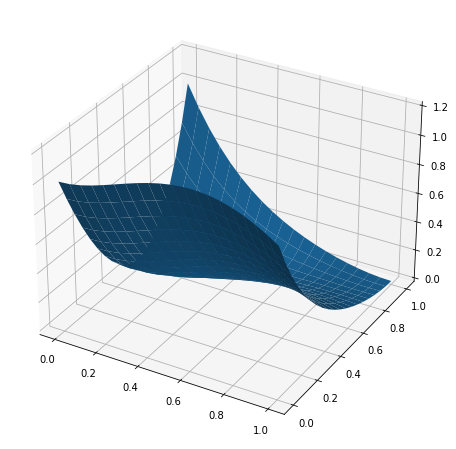

In [24]:
from matplotlib import pyplot as plt
import numpy as np
p = pl('s(a2)2-3s(a3b)').subs('c',1)
coor = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
z = [[float(p.subs('a',coor[0][i][j]).subs('b',coor[1][i][j])) for i in range(len(coor[0]))] for j in range(len(coor[1]))]

fig, ax = plt.subplots(1,1, figsize = (8, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(coor[0], coor[1], np.array(z))
plt.show()

$a,b,c>0$
$$\left(\sum\frac{a^2+b^2-c^2}{2ab}\cdot \frac{a^2+c^2-b^2}{2ac}\right)^2\geqslant 4\prod \frac{b^2+c^2-a^2}{2bc}$$

Proof: 
$$\left\{\begin{aligned}\sum\frac{a^2+b^2-c^2}{2ab}\cdot \frac{a^2+c^2-b^2}{2ac}&= \frac{\prod (b+c-a)}{2a^2b^2c^2}\sum(a^2b+ab^2+\frac13abc)-2\\
 4\prod \frac{b^2+c^2-a^2}{2bc} &= \frac{\prod (b+c-a)}{2a^2b^2c^2}\cdot (a+b+c)(a^2+b^2+c^2) - 4
\end{aligned}\right. $$


In [11]:
# s((b2+c2-a2)(c2+a2-b2)ab)2-8p((b2+c2-a2))a2b2c2
# s((b2+c2-a2)(c2+a2-b2)ab)2-8p((b2+c2-a2))a2b2c2-s(c2(a5-(a4b+abc3)-0(a3bc+a2bc2)-2a3c2+ac4+4a2b2c+(a2b3+ab3c))2)
# pl('s((b2+c2-a2)(c2+a2-b2)/(2acbc))-2p((b2+c2-a2)/(2bc))').as_expr().factor()
pl('4p((b2+c2-a2)/(2bc))+4').as_expr().factor()
# pl('s((b2+c2-a2)(c2+a2-b2)/(2acbc))+2').as_expr().factor()
# s(a2b+ab2+abc/3)2p(b+c-a)-4s(a2b+ab2+abc/3)*2a2b2c2-s(a)s(a2)*2a2b2c2

-(a - b - c)*(a - b + c)*(a + b - c)*(a + b + c)*(a**2 + b**2 + c**2)/(2*a**2*b**2*c**2)

In [2]:
pl('s(a8(b+c)(a-b)(a-c))s(a)-0s(a(b-c)2(b+c-a)6)-4abcs(a7(a-b)(a-c))-s(a9(b+c)(a-b)(a-c))').factor_list()

(1,
 [(Poly(b - c, a, b, c, domain='QQ'), 2),
  (Poly(a - b, a, b, c, domain='QQ'), 2),
  (Poly(a - c, a, b, c, domain='QQ'), 2),
  (Poly(a**6 + a**5*b + a**5*c + a**4*b**2 + a**4*b*c + a**4*c**2 + a**3*b**3 + a**3*b**2*c + a**3*b*c**2 + a**3*c**3 + a**2*b**4 + a**2*b**3*c + a**2*b**2*c**2 + a**2*b*c**3 + a**2*c**4 + a*b**5 + a*b**4*c + a*b**3*c**2 + a*b**2*c**3 + a*b*c**4 + a*c**5 + b**6 + b**5*c + b**4*c**2 + b**3*c**3 + b**2*c**4 + b*c**5 + c**6, a, b, c, domain='QQ'),
   1)])

## Schur

当 $n\leqslant 8$
$$\sum a^{2n}(b+c)(a-b)(a-c)\geqslant \sum a(b-c)^2(b+c-a)^2(b^{n-1}+c^{n-1}-a^{n-1})^2$$

***

令 $E_n = \sum_{x+y+z=n}a^xb^yc^z$

$$\sum a^{n}(b+c)(a-b)(a-c)\prod (a+b)=4abc\sum a^{n-1}(a^2-b^2)(a^2-c^2) + \prod (a-b)^2\left(E_n + E_{n-2} \sum ab \right)$$

$$E_n = E_{n-1}\sum a - E_{n-2}\sum ab +E_{n-3}abc$$
<br>

***

$$\sum a^n(a-b)(a-c)\geqslant \frac{n+1}{n-3}E_{n-4}\prod (a-b)^2$$
只需证
$$E_n\geqslant \frac{n+1}{n-3}E_{n-4}\sum (a^2b^2-a^2bc)$$

证: 
$$\begin{aligned}E_n-\frac{n+1}{n-3}E_{n-4}\sum (a^2b^2-a^2bc)&
=\sum a^{n-2}(a-b)(a-c)+\frac{2}{n-3}\sum_{k=1}^{n-3} \sum ab\left(a^{n-2}+b^{n-2}-a^kb^{n-2-k}-a^{n-2-k}b^k \right)
\\ &+\frac{2n-2}{n-3}abc \sum_{k=1}^{n-4}\sum a^k b^{n-3-k}  +\frac{n+1}{n-3}abc\sum a^{n-3} + a^2b^2c^2E_{n-6}
\end{aligned}
$$

In [158]:
def euler(n = 4):
    n += 2
    a,b,c = sp.symbols('a b c')
    return sp.cancel(a**n/(a-b)/(a-c)+b**n/(b-c)/(b-a) + c**n/(c-a)/(c-b))
n = 5
swa(euler(n)-(n+1)*(euler(n-4)+0*pl('a*b*c')*euler(n-7))*pl('s(a2b2-a2bc)')/(n-3)-pl(f's(a^{n-2}(a-b)(a-c))+0s(a^{n-6}(a2-b2)(a2-c2))s(ab)'))
0
# pl('a7+a6b+a5b2+a4b3+a3b4+a2b5+ab6+b7+c(s(a6+a5b+a4b2+a3b3+a2b4+ab5)+abcs(a3+a2b+ab2)+a2b2c2)-2s(a3+a2b+ab2+abc/3)s(a2b2-a2bc)-0s(a(b+c-a)2(b-c)4)-0(s(a5(a-b)(a-c))-0s(a)p(a-b)2)-0s(ab)s(a3(a-b)(a-c))').factor_list()

Poly(2*a^4*b+2*a^4*c-2*a^3*b^2+3*a^3*b*c-2*a^3*c^2-2*a^2*b^3+4*a^2*b^2*c+4*a^2*b*c^2-2*a^2*c^3+2*a*b^4+3*a*b^3*c+4*a*b^2*c^2+3*a*b*c^3+2*a*c^4+2*b^4*c-2*b^3*c^2-2*b^2*c^3+2*b*c^4,a,b,c,domain='QQ')


0

In [38]:
# s(a6(b+c)(a-b)(a-c))-s(a(b-c)2((b+c-a)(b2+c2-a2)+(a-b)(a-c)(b+c))2)
# sp.cancel(sp.sympify('(a^n/(a-b)/(a-c)/(b+c))+b^n/(b-c)/(b-a)/(a+c)+c^n/(c-a)/(c-b)/(a+b)').subs('n',3)).factor()
# pl('s(a6(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)6)-0p(a-b)2s(a)').factor_list()
# pl('s(a6(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2((b+c-a)2-2(a-b)(a-c))2)').factor_list()
# pl('s(a4(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)0((b+c-a)2-(a-b)(a-c))2)').factor_list()
# swa(pl('s(a8(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b3+c3-a3)2)').factor_list()[-1][-1])
# swa(pl('s(a6(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b2+c2-a2)2)').factor_list()[-1][-1])
# swa(pl('s(a12(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b5+c5-a5)2)').factor_list()[-1][-1])
# swa(pl('s(a4(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b+c-a)2)').factor_list()[-1][-1])
pl('s(a6(b+c)(a-b)(a-c))-s(a(b-c)2((b+c-a)(b2+c2-a2)+(a-b)(a-c)(b+c))2(b3+c3-a3)0)').factor_list()
# pl('s(a4(b+c)(a-b)(a-c))-s(a(b-c)2((b+c-a)(b+c-a)+(a-b)(a-c))2)').factor_list()
# pl('s(a8(b+c)(a-b)(a-c))-s(a(b-c)2((b+c-a)(b3+c3-a3)+0(a-b)(a-c)(b-c)2)2)').factor_list()
# pl('s(a8(b+c)(a-b)(a-c))-s(a(b-c)2((b+c-a)2(b2+c2-a2)-(a-b)(a-c)(b+c)2)2)').factor_list()

(2,
 [(Poly(b - c, a, b, c, domain='QQ'), 2),
  (Poly(a + b + c, a, b, c, domain='QQ'), 1),
  (Poly(a - b, a, b, c, domain='QQ'), 2),
  (Poly(a - c, a, b, c, domain='QQ'), 2),
  (Poly(a**2 - a*b - a*c + b**2 - b*c + c**2, a, b, c, domain='QQ'), 1)])

In [71]:
swa(pl('s(a18(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b8+c8-a8)2)').factor_list()[-1][-1])

(Poly(a^14*b+a^14*c+a^13*b^2+4*a^13*b*c+a^13*c^2+a^12*b^3+4*a^12*b^2*c+4*a^12*b*c^2+a^12*c^3+a^11*b^4+4*a^11*b^3*c+2*a^11*b^2*c^2+4*a^11*b*c^3+a^11*c^4+a^10*b^5+4*a^10*b^4*c+4*a^10*b*c^4+a^10*c^5+a^9*b^6+4*a^9*b^5*c-2*a^9*b^4*c^2-4*a^9*b^3*c^3-2*a^9*b^2*c^4+4*a^9*b*c^5+a^9*c^6+3*a^8*b^7+6*a^8*b^6*c-2*a^8*b^5*c^2-6*a^8*b^4*c^3-6*a^8*b^3*c^4-2*a^8*b^2*c^5+6*a^8*b*c^6+3*a^8*c^7+3*a^7*b^8+4*a^7*b^7*c-6*a^7*b^6*c^2-12*a^7*b^5*c^3-14*a^7*b^4*c^4-12*a^7*b^3*c^5-6*a^7*b^2*c^6+4*a^7*b*c^7+3*a^7*c^8+a^6*b^9+6*a^6*b^8*c-6*a^6*b^7*c^2-14*a^6*b^6*c^3-18*a^6*b^5*c^4-18*a^6*b^4*c^5-14*a^6*b^3*c^6-6*a^6*b^2*c^7+6*a^6*b*c^8+a^6*c^9+a^5*b^10+4*a^5*b^9*c-2*a^5*b^8*c^2-12*a^5*b^7*c^3-18*a^5*b^6*c^4-20*a^5*b^5*c^5-18*a^5*b^4*c^6-12*a^5*b^3*c^7-2*a^5*b^2*c^8+4*a^5*b*c^9+a^5*c^10+a^4*b^11+4*a^4*b^10*c-2*a^4*b^9*c^2-6*a^4*b^8*c^3-14*a^4*b^7*c^4-18*a^4*b^6*c^5-18*a^4*b^5*c^6-14*a^4*b^4*c^7-6*a^4*b^3*c^8-2*a^4*b^2*c^9+4*a^4*b*c^10+a^4*c^11+a^3*b^12+4*a^3*b^11*c-4*a^3*b^9*c^3-6*a^3*b^8*c^4-12*a^3*b^7*c^5-14*a^3*

"(Poly(a^14*b+a^14*c+a^13*b^2+4*a^13*b*c+a^13*c^2+a^12*b^3+4*a^12*b^2*c+4*a^12*b*c^2+a^12*c^3+a^11*b^4+4*a^11*b^3*c+2*a^11*b^2*c^2+4*a^11*b*c^3+a^11*c^4+a^10*b^5+4*a^10*b^4*c+4*a^10*b*c^4+a^10*c^5+a^9*b^6+4*a^9*b^5*c-2*a^9*b^4*c^2-4*a^9*b^3*c^3-2*a^9*b^2*c^4+4*a^9*b*c^5+a^9*c^6+3*a^8*b^7+6*a^8*b^6*c-2*a^8*b^5*c^2-6*a^8*b^4*c^3-6*a^8*b^3*c^4-2*a^8*b^2*c^5+6*a^8*b*c^6+3*a^8*c^7+3*a^7*b^8+4*a^7*b^7*c-6*a^7*b^6*c^2-12*a^7*b^5*c^3-14*a^7*b^4*c^4-12*a^7*b^3*c^5-6*a^7*b^2*c^6+4*a^7*b*c^7+3*a^7*c^8+a^6*b^9+6*a^6*b^8*c-6*a^6*b^7*c^2-14*a^6*b^6*c^3-18*a^6*b^5*c^4-18*a^6*b^4*c^5-14*a^6*b^3*c^6-6*a^6*b^2*c^7+6*a^6*b*c^8+a^6*c^9+a^5*b^10+4*a^5*b^9*c-2*a^5*b^8*c^2-12*a^5*b^7*c^3-18*a^5*b^6*c^4-20*a^5*b^5*c^5-18*a^5*b^4*c^6-12*a^5*b^3*c^7-2*a^5*b^2*c^8+4*a^5*b*c^9+a^5*c^10+a^4*b^11+4*a^4*b^10*c-2*a^4*b^9*c^2-6*a^4*b^8*c^3-14*a^4*b^7*c^4-18*a^4*b^6*c^5-18*a^4*b^5*c^6-14*a^4*b^4*c^7-6*a^4*b^3*c^8-2*a^4*b^2*c^9+4*a^4*b*c^10+a^4*c^11+a^3*b^12+4*a^3*b^11*c-4*a^3*b^9*c^3-6*a^3*b^8*c^4-12*a^3*b^7*c^5-14*a^3

In [98]:
# swa(pl('s(a14(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b6+c6-a6)2)').factor_list()[-1][-1])
# swa(pl('s(a16(b+c)(a-b)(a-c))-s(a(b-c)2(b+c-a)2(b7+c7-a7)2)').factor_list()[-1][-1])
# swa(pl('s(a5(b+c)(a-b)(a-c)) - s(bc(b-c)2(4(a-b)(a-c)(b+c)0-(b+c-a)(b+c-a))2)').factor_list()[-1][-1])
# swa(pl('s(a7(b+c)(a-b)(a-c)) - s(bc(b-c)2(2(a-b)(a-c)(b+c)-(b+c-a)(b2+c2-a2))2)').factor_list()[-1][-1])
# swa(pl('s(a9(b+c)(a-b)(a-c)) - s(bc(b-c)2((a-b)(a-c)(b+c)2-(b+c-a)(b3+c3-a3))2)').factor_list()[-1][-1])
# swa(pl('s(a11(b+c)(a-b)(a-c)) - s(bc(b-c)2(1/2(a-b)(a-c)(b+c)3-(b+c-a)(b4+c4-a4))2)').factor_list()[-1][-1])
# swa(pl('s(a13(b+c)(a-b)(a-c)) - s(bc(b-c)2(1/4(a-b)(a-c)(b+c)4-(b+c-a)(b5+c5-a5))2)').factor_list()[-1][-1])
# n = 4
# kk = pl(f's(a^(2*{n}+3)(b+c)(a-b)(a-c)) - s(bc(b-c)2(k*(a-b)(a-c)(b+c)^({n}-1)-(b+c-a)(b^{n}+c^{n}-a^{n}))2)').subs('c',0).subs('b',1).factor_list()[-1][-1][0].subs('a',1)
# k1 = sp.polys.nroots(kk)[-1]
# print(sp.polys.roots(kk))
# print(f's(a^(2*{n}+3)(b+c)(a-b)(a-c)) - s(bc(b-c)2({k1}*(a-b)(a-c)(b+c)^({n}-1)-(b+c-a)(b^{n}+c^{n}-a^{n}))2)')
# yy = pl('s(a^(2*7+3)(b+c)(a-b)(a-c)) - s(bc(b-c)2(k*(a-b)(a-c)(b+c)^(7-1)-(b+c-a)(b^7+c^7-a^7))2)').factor_list()[-1][-1][0]
# swa(yy.subs('k', k1))
# pl('s(a8(b+c)(a-b)(a-c))-0s(a(b-c)2((b+c-a)(b2+c2-a2)+(a-b)(a-c)(b+c))2(b3+c3-a3)0)-2p(a-b)2s(a5-a3bc)').factor_list()
pl('s(a5(b+c)(a-b)(a-c))-0s(a2-ab)p(a-b)2-s(bc(b-c)2(b2+c2-a2)2)').factor_list()
n = 5
swa(pl(f's(a^{n}(b+c)(a-b)(a-c))p(a+b)-4abcs(a^{n-1}(a2-b2)(a2-c2))').factor_list()[-1][-1][0])

Poly(a^5+2*a^4*b+2*a^4*c+2*a^3*b^2+4*a^3*b*c+2*a^3*c^2+2*a^2*b^3+4*a^2*b^2*c+4*a^2*b*c^2+2*a^2*c^3+2*a*b^4+4*a*b^3*c+4*a*b^2*c^2+4*a*b*c^3+2*a*c^4+b^5+2*b^4*c+2*b^3*c^2+2*b^2*c^3+2*b*c^4+c^5,a,b,c,domain='QQ')


"Poly(a^5+2*a^4*b+2*a^4*c+2*a^3*b^2+4*a^3*b*c+2*a^3*c^2+2*a^2*b^3+4*a^2*b^2*c+4*a^2*b*c^2+2*a^2*c^3+2*a*b^4+4*a*b^3*c+4*a*b^2*c^2+4*a*b*c^3+2*a*c^4+b^5+2*b^4*c+2*b^3*c^2+2*b^2*c^3+2*b*c^4+c^5,a,b,c,domain='QQ')"